<a href="https://colab.research.google.com/github/vidhyavasan2002/Letsgrowmore_task1/blob/main/TASK1_Iris_Flower_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Lets Grow More** 
#**Data Science Internship** 
#Author: **VIDHYA LAKSHMI SRINIVASAN**



#**Title: Iris Flowers Classification ML Project**


**The goal is to create a machine learning model that can learn from the measurements of these irises whose species are already known, so that we can predict the species for the new irises.**

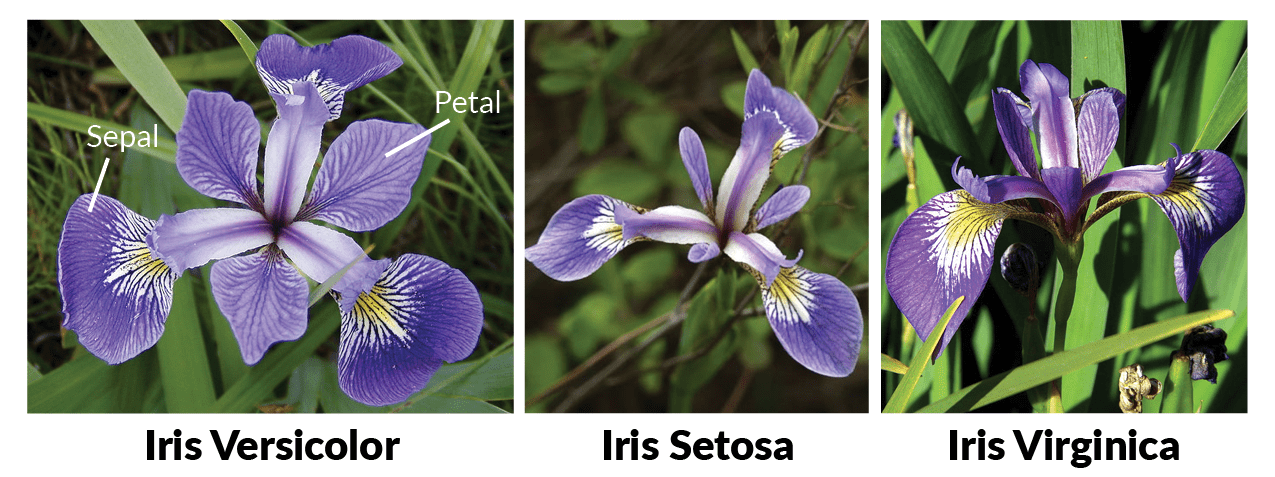

#**1. Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
iris_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [4]:
iris_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
iris_data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [6]:
columns = ['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width', 'class']

In [7]:
iris_data.columns = columns
iris_data.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


#**2. Understanding The Data**

In [8]:
iris_data.shape

(149, 5)

In [9]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lenght  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_lenght  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
iris_data.describe()

,sepal_lenght,sepal_width,petal_lenght,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#**3. Missing Value's Imputation**

In [11]:
iris_data.isnull().sum()

sepal_lenght    0
sepal_width     0
petal_lenght    0
petal_width     0
class           0
dtype: int64

#**4. Data Visualization**

**Box Plot**

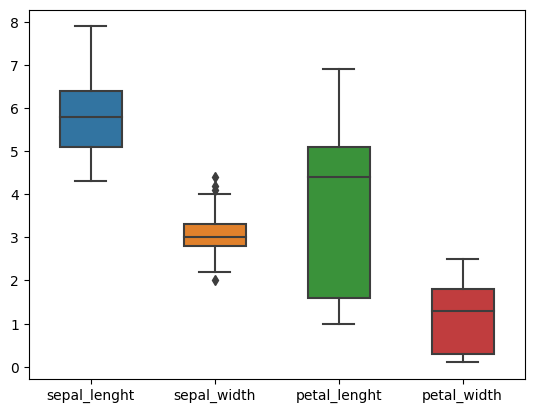

In [12]:
sns.boxplot(data = iris_data, width= 0.5, fliersize = 5)
sns.set(rc = {"figure.figsize" :(6,6)})

**Exploring the correlation between different columns**


**Heatmap**

<ipython-input-13-29570db8ae98>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=iris_data.corr()


Index(['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width', 'class'], dtype='object')

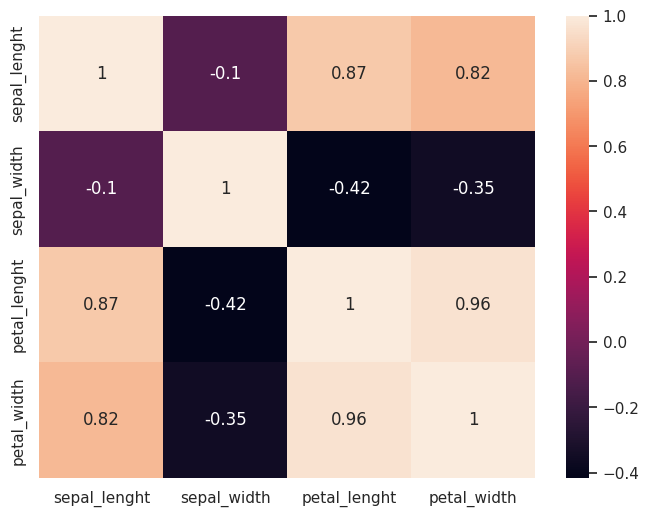

In [13]:
#Plotting a heatmap to determine the correlation between column quantities
corr=iris_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
iris_data.columns

**Violin plot**


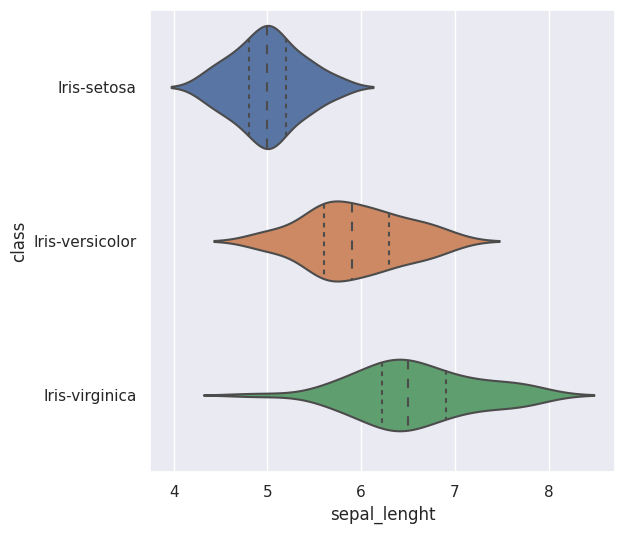

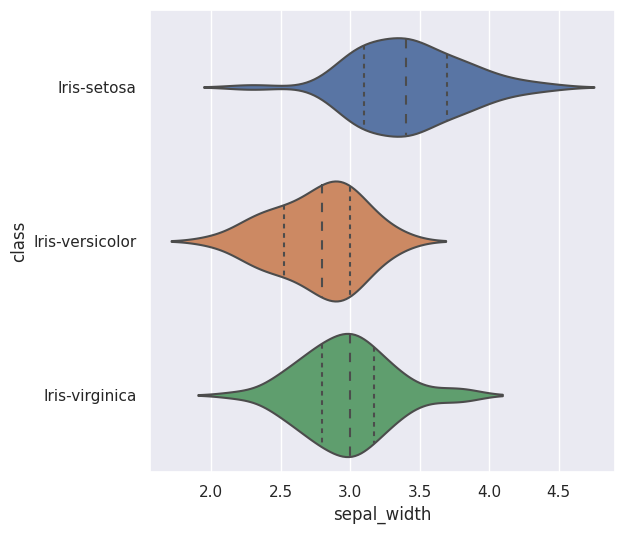

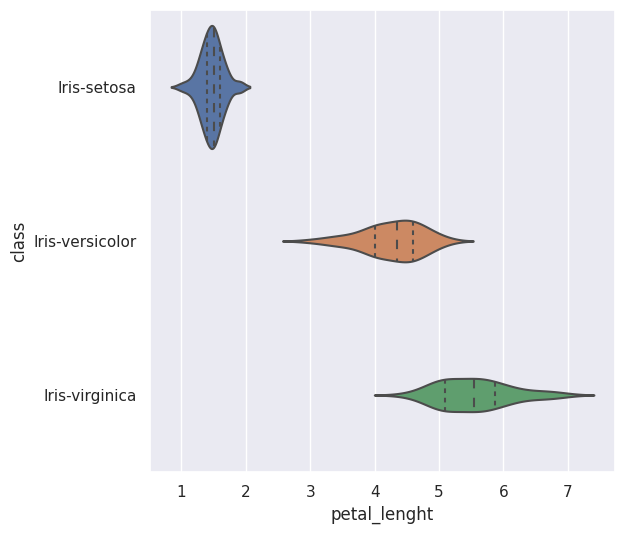

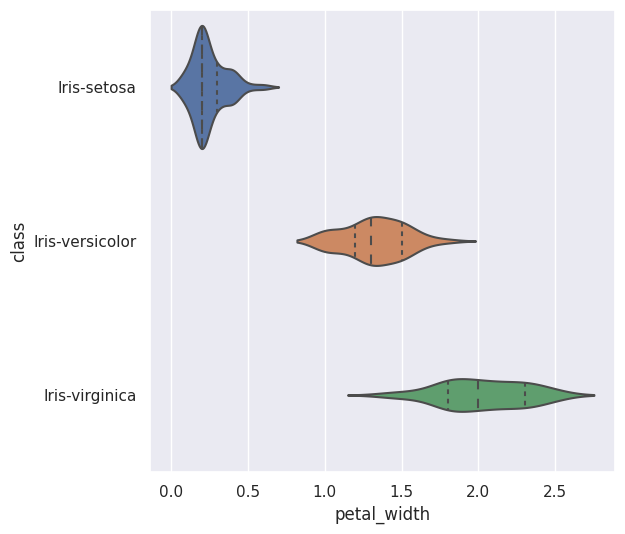

In [14]:
sns.violinplot(y='class', x='sepal_lenght', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal_width', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal_lenght', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal_width', data=iris_data, inner='quartile')
plt.show()

The above-plotted violin plot says that Iris-Setosa class is having a smaller petal length and petal width compared to other class.

#**5. Model Building - Part-A**



As we have measurements for which we know the correct species of iris, this is a supervised learning problem. We want to predict one of several options (the species of iris), making it an example of a classification problem. 

To test the model’s performance, we show it new data for which we have labels 
This is usually done by splitting the labelled data we have collected into two parts. One part of the data is used to build the machine learning model, and is called the training data or training set (which we will call x_train and y_train). The rest of the data will be used to test how well the model works; this is called the test set, test data, or hold-out set (which we will call X_test, y_test).

**5.1.X is having all the dependent variables.**

**Y is having an independent variable (here in this case ‘class’ is an independent variable).**

In [15]:
X = iris_data.drop(['class'], axis=1)
y = iris_data['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (149, 4) | y shape: (149,) 


Here, we can see from the output that the X has 150 rows and 4 columns whereas Y has 150 rows and only one column.

**5.2 Train Test split**


Splitting our dataset into train and test using train_test_split(), what we are doing here is taking 80% of data to train our model, and 20% that we will hold back as a validation dataset:

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

**5.3 Model Creation**

**Support Vector Machines (SVM)**
Support Vector Classifier (SVC) is performing better than other algorithms.
Let’s train SVC model on our training set and predict on test set in the next step.



In [17]:
model = []
model.append(('SVC', SVC(gamma='auto')))

#**6. Model Building - Part-B**

6.1. We are defining our SVC model and passing gamma as auto

6.2.After that fitting/training the model on X_train and Y_train using .fit() method.

6.3. Then we are predicting on X_test using .predict() method.
model = SVC(gamma='auto')

In [18]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

**6.4. Now checking the accuracy of model**

In [19]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.9333333333333333
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         4
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.50      0.67         2

       accuracy                           0.93        15
      macro avg       0.97      0.83      0.87        15
   weighted avg       0.94      0.93      0.92        15



#**Conclusion**

**For this model, the accuracy on the test set is 0.93, which means the model made the right prediction for 93% of the irises in the given dataset. We can expect the model to be correct 93% of the time for predicting the species of new irises.
This is a high level of accuracy and it means that our model may be trustworthy enough to use.**

##        **THANK YOU** 